# First-mover advantage
I will formulate a problem in terms of a hypothetical match-making game. Suppose there is a blind dating game, where a woman has to select a partner among various players based on conversation only. The rules are as follows:
1. There are 10 players and the game ends only if she selects one of them.
2. There is a predetermined order in which she gets to speak with the players.
3. In each round she selects one conversation topic and she is allowed to discuss only that topic with all the 10 players.
3. At the end of each conversation she must either select the player (thus ending the game) or proceed to the next one.
4. If she has spoken with all 10 players and not selected anybody, then she can start another round of conversations based on a new topic.

Among all players there is one (let us say the 8th player), who is her true "soul mate". In other words, with this person the expected enjoyment over all possible conversation topics is maximum. For simplicity, let us assume that all others have a low probability of being selected (let us say capped at 0.4) and the 8th player has a high probability of being selected at any round of conversation. Suppose we play this game with 1000 different women. How many of them will actually select the 8th player?

In [1]:
# Context information
n_outcomes <- 2 # select partner or proceed to the next one
outcomes <- c(1:n_outcomes)
winningOutcome <- 1 # 1 signifies partner selection
players <- c(1:10) # in ascending order of priority - 7 candidates before the 8th one

In [2]:
# Probabilistic winner - the player with the highest probability of winning (8th one)
probabilistic_winner <- 8
gen_winner_prob <- function() {
    vector <- sample(c(1:100), size=length(outcomes), replace=TRUE)
    vector[winningOutcome] <- 1.5*max(vector) # increase the probability of winning
    winner_prob <- vector/sum(vector) # scale it to make it a probability vector
    return(winner_prob)
}
gen_winner_prob()[1]

[1] 0.6

In [3]:
# Others - all others have a low probability of winning
probability_cap <- 0.4
gen_others_prob <- function() {
    p <- runif(1, min=0.01, max=probability_cap) # probability of winning capped at probability_cap
    vector <- sample(c(1:100), size=length(outcomes)-1, replace=TRUE)
    vector <- ((1-p)*vector)/sum(vector)
    others_prob <- c(p, vector) # set p as the probability of winning for others
    return(others_prob)
}
gen_others_prob()[1]

[1] 0.09227363

In [4]:
# Play - one round so that each player gets a chance according to the order of priority
play <- function() {
    for (i in players) {
        if (i == probabilistic_winner) {
            winner_prob <- gen_winner_prob()
            x <- sample(outcomes, size=1, replace=TRUE, prob = winner_prob) # use high probability of winning
        }
        if (i != probabilistic_winner) {
            others_prob <- gen_others_prob()
            x <- sample(outcomes, size=1, replace=TRUE, prob = others_prob) # no enhanced probability of winning
        } 
        if (x==winningOutcome) return(i)
    }
}

In [5]:
# Game - keep playing until the game ends with a winner
game <- function() {
  counter <- 1
  outcome <- integer(2)
  while (TRUE) {
    result <- play()
    outcome[2] <- counter
    if (is.null(result)==FALSE) {
      outcome[1] <- result
      return(outcome)
    }
    else {
      counter <- counter + 1
      }
    }
}

In [6]:
# Define simulation parameters and run it
n_trials <- 1000 # play the same game with 1000 different women
gameLength <- integer(n_trials) # keep track of the number of rounds needed to complete the game
victoryTable <- integer(n_trials) # keep track of the winners

for (i in c(1:n_trials)) {
  winner <- game()
  gameLength[i] <- winner[2]
  victoryTable[i] <- winner[1]
}

In [7]:
# Show the frequency table of the victories of the players
frequency_victory <- table(victoryTable)
print(frequency_victory)

victoryTable
  1   2   3   4   5   6   7   8   9  10 
207 158 145 127  81  62  46 153  10  11 


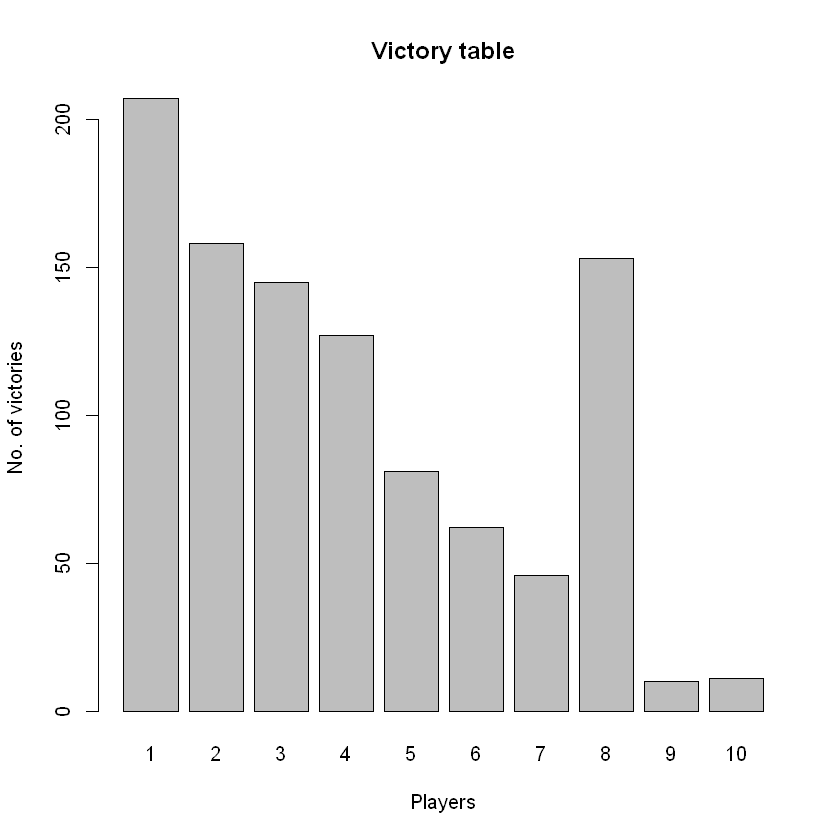

In [8]:
# Show the victory table as a barplot - look at the 8th column!!
barplot(frequency_victory, xlab = "Players", ylab = "No. of victories", 
     main = "Victory table")

In [9]:
# Show the frequency table of the lengths of the games
frequency_gameLength <- table(gameLength)
print(frequency_gameLength)

gameLength
  1   2   3 
971  26   3 


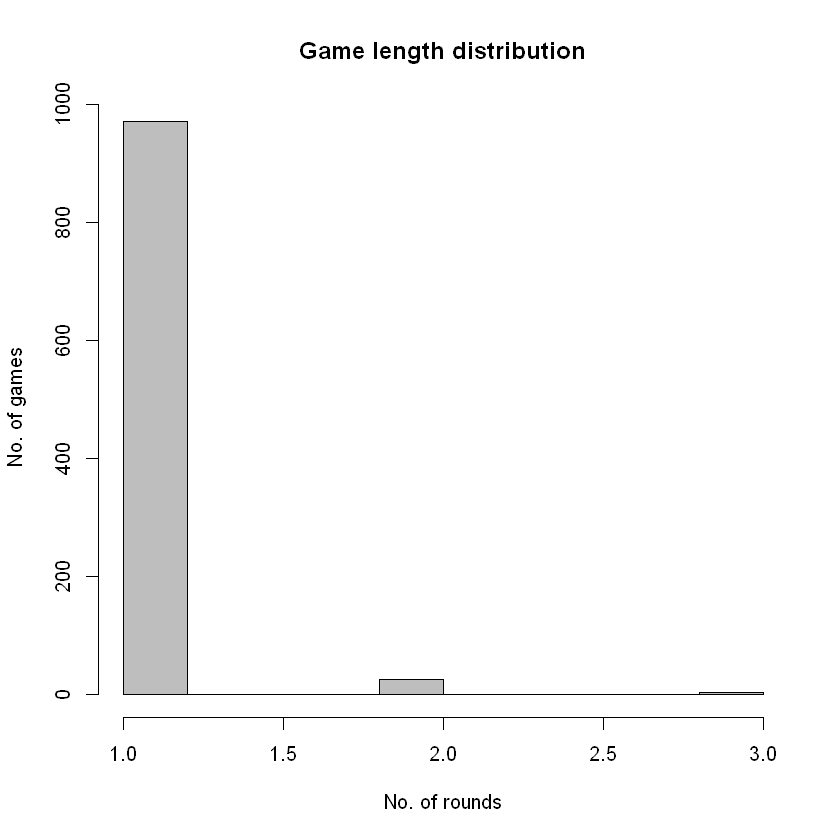

In [10]:
# Show the histogram of the lengths of the games
hist(gameLength, col = "gray", 
     xlab = "No. of rounds", ylab = "No. of games", 
     main = "Game length distribution")

One can now play with the parameters like `n_outcomes`, `players`, `probability_cap` and the functions like `gen_winner_prob()`, `gen_others_prob()` to analyze various scenarios. Quite predictably, the first-mover advantage is governed by the probability of winning, which in turn depends on factors like `n_outcomes`, `players`, `probability_cap`, etc.